In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fitness_data=pd.read_csv(r"C:\Users\mukes\Downloads\Fitnessdata.csv",parse_dates=True,index_col='Date')
fitness_data.head()

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


In [3]:
fitness_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
Activity Id                 508 non-null object
Type                        508 non-null object
Route Name                  1 non-null object
Distance (km)               508 non-null float64
Duration                    508 non-null object
Average Pace                508 non-null object
Average Speed (km/h)        508 non-null float64
Calories Burned             508 non-null float64
Climb (m)                   508 non-null int64
Average Heart Rate (bpm)    294 non-null float64
Friend's Tagged             0 non-null float64
Notes                       231 non-null object
GPX File                    504 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 55.6+ KB


In [4]:
cols_drop = ['Friend\'s Tagged','Route Name','Activity Id', 'Notes','GPX File']
fitness_data.drop(cols_drop, axis=1,inplace=True)

In [5]:
print(fitness_data['Type'].value_counts())

Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64


In [6]:
fitness_data['Type']=fitness_data['Type'].replace("Other","Unicycling")

In [7]:
fitness_data['Type'].value_counts()

Running       459
Cycling        29
Walking        18
Unicycling      2
Name: Type, dtype: int64

In [8]:
fitness_data.isnull().sum()

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

# Treating missing values

In [9]:
#fitness_data['GPX File'].fillna(fitness_data['GPX File'].mode(),inplace=True)

In [10]:
avg_run=fitness_data[fitness_data['Type']=='Running']['Average Heart Rate (bpm)'].mean()
avg_cycle=fitness_data[fitness_data['Type']=="Cycling"]['Average Heart Rate (bpm)'].mean()

In [11]:
fitness_run=fitness_data[fitness_data["Type"]=="Running"]
fitness_cycle=fitness_data[fitness_data["Type"]=="Cycling"]
fitness_walk=fitness_data[fitness_data["Type"]=="Walking"]

fitness_walk['Average Heart Rate (bpm)'].fillna(110,inplace=True)
fitness_run['Average Heart Rate (bpm)'].fillna(int(avg_run),inplace=True)
fitness_cycle['Average Heart Rate (bpm)'].fillna(int(avg_cycle),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [12]:
#fitness_data['Average Heart Rate (bpm)'].fillna(fitness_data['Average Heart Rate (bpm)'].mode()[0],inplace=True)
# we can do this beacuase bpm rate for walk run cycle will be different.

In [13]:
fitness_run.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Calories Burned             0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

In [14]:
fitness_run.head()

,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm)
Date,,,,,,,,
2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,774.0,130,159.0
2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,954.0,168,159.0
2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,967.0,171,155.0
2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,960.0,169,158.0
2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,967.0,170,154.0


In [15]:
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.'))

In [16]:
fitness_run_2013_2018=fitness_run['20180101':'20130101']
fitness_run_2013_2018.head()

,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm)
Date,,,,,,,,
2017-12-30 17:11:53,Running,11.69,1:10:16,6:01,9.98,841.0,192,150.0
2017-12-27 18:50:24,Running,8.29,45:56,5:33,10.83,622.0,131,147.0
2017-12-04 18:14:41,Running,10.00,59:43,5:58,10.05,717.0,160,142.0
2017-11-25 12:17:22,Running,12.85,1:10:04,5:27,11.00,899.0,176,157.0
2017-11-22 18:21:12,Running,7.55,43:29,5:46,10.42,534.0,129,140.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011BB7B75688>,
      dtype=object)

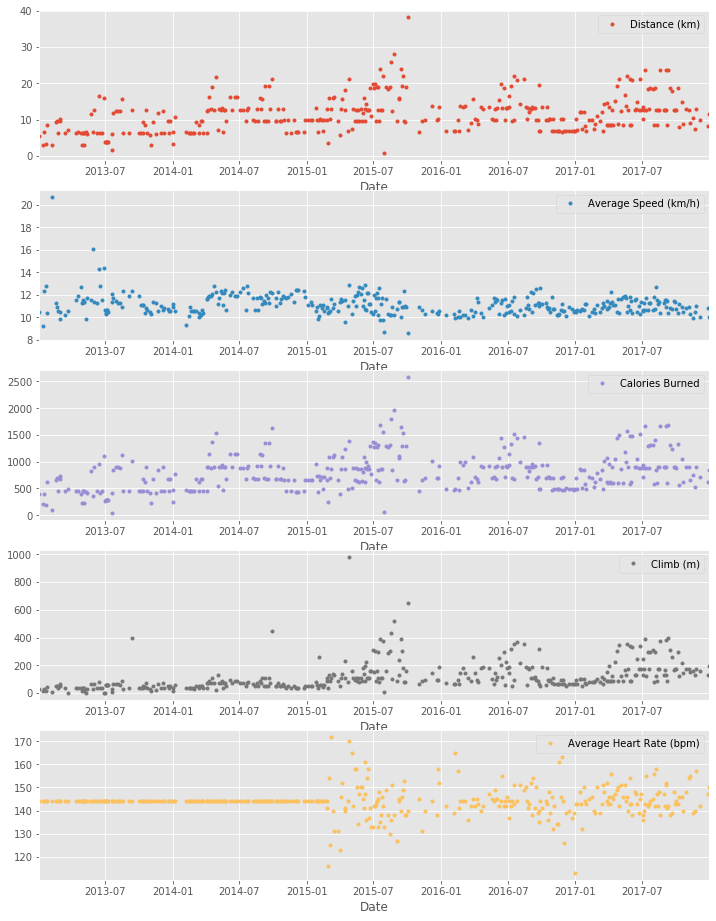

In [17]:
fitness_run_2013_2018.plot(subplots=True,sharex=False,figsize=(12,16),linestyle='none',marker="o",markersize=3)

In [18]:
# Annual statistics
print("Average Run look like")
display(fitness_run_2013_2018.resample('A').mean())

Average Run look like


,Distance (km),Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm)
Date,,,,,
2013-12-31,7.549242,11.399545,528.030303,45.166667,144.000000
2014-12-31,10.953043,11.519130,775.333333,65.275362,144.000000
2015-12-31,13.602805,10.998902,932.906138,160.170732,143.353659
2016-12-31,11.411667,10.837778,796.152777,133.194444,143.388889
2017-12-31,12.935176,10.959059,914.164706,169.376471,145.247059


In [19]:
#Weekly Statistics
print("Weekly Avg")
display(fitness_run_2013_2018.resample('W').mean().mean())

Weekly Avg


Distance (km)                11.256381
Average Speed (km/h)         11.117511
Calories Burned             787.815096
Climb (m)                   113.847032
Average Heart Rate (bpm)    143.994673
dtype: float64

In [20]:
# Mean weekly counts
weekly_counts_average = fitness_run_2013_2018['Distance (km)'].resample('W').count().mean()
print('How many trainings per week I had on average:', weekly_counts_average)

How many trainings per week I had on average: 1.4329501915708813


# visualizaion with avg

Date
2017-12-30 17:11:53    11.69
2017-12-27 18:50:24     8.29
2017-12-04 18:14:41    10.00
2017-11-25 12:17:22    12.85
2017-11-22 18:21:12     7.55
                       ...  
2013-01-23 18:38:29     8.65
2013-01-19 09:58:50     3.39
2013-01-15 18:40:08     6.72
2013-01-12 08:39:55     3.09
2013-01-02 18:35:11     5.47
Name: Distance (km), Length: 374, dtype: float64


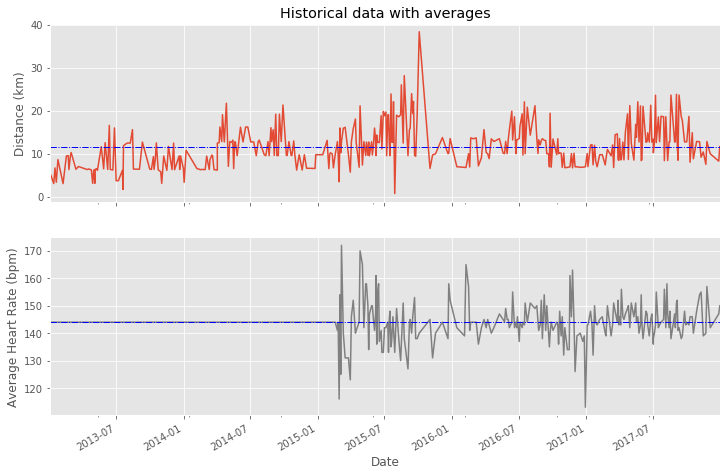

In [21]:
runs_distance = fitness_run_2013_2018['Distance (km)']
print(runs_distance)
runs_hr = fitness_run_2013_2018['Average Heart Rate (bpm)']

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

runs_distance.plot(ax=ax1)
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.')

# Did i reach goal

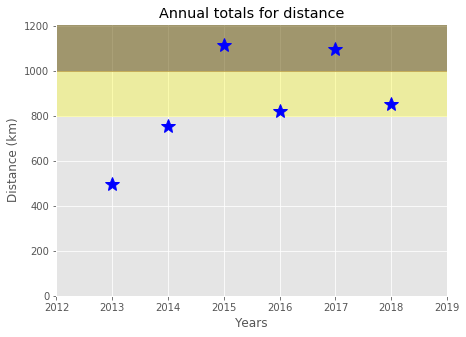

In [22]:
# Prepare data
df_run_dist_annual = fitness_run.sort_index()['20130101':'20181231']['Distance (km)'] \
                    .resample('A').sum()
fig = plt.figure(figsize=(7, 5))
ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1210], 
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')
ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(1000, 1210, color='red', alpha=0.2)

In [23]:
# intensity
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']
fitness_run_hr_all = fitness_data.loc['20190101':'20150301']['Average Heart Rate (bpm)']

[Text(0, 0, 'Easy'),
 Text(0, 0, 'Moderate'),
 Text(0, 0, 'Hard'),
 Text(0, 0, 'Very hard'),
 Text(0, 0, 'Maximal')]

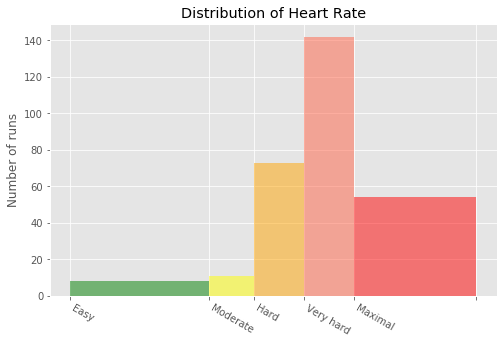

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))
n, bins, patches = ax.hist(fitness_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])
ax.set(title='Distribution of Heart Rate', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones)
ax.set_xticklabels(labels=zone_names, rotation=-30, ha='left')

# summary

In [25]:
fitness_tot=fitness_run.append([fitness_cycle,fitness_walk]).sort_index(ascending=False)
dist_climb,speed_cols=['Distance (km)','Climb (m)'],['Average Speed (km/h)']

In [26]:
fitness_tot=fitness_tot.groupby('Type')[dist_climb].sum()
fitness_tot

,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


In [27]:
fitness_sumary=fitness_tot.groupby('Type')[dist_climb + speed_cols].describe()
fitness_sumary

KeyError: "Columns not found: 'Average Speed (km/h)'"

In [ ]:
for i in dist_climb:
    fitness_sumary[i,'total']=fitness_tot[i]
print('Summary statistics for different training types:')
fitness_sumary.stack()